Decimal Scaled: [0.32323232323232326 0.47474747474747475 0.7272727272727273
 0.12121212121212122 0.16161616161616163 0.25252525252525254
 0.12121212121212122 0.0707070707070707 0.5959595959595959
 0.696969696969697]
Z-score Scaled: [-0.1315059500433155 0.5048131630695011 1.5653450182575288
 -0.9799314341937376 -0.8102463373636531 -0.42845486949596323
 -0.9799314341937376 -1.1920378052313432 1.0138684535597544
 1.4380811956349655]
Min-max Scaled: [0.38461538461538464 0.6153846153846154 1.0 0.07692307692307693
 0.13846153846153847 0.27692307692307694 0.07692307692307693 0.0 0.8
 0.9538461538461539]
Centroids of Data Points [47.0, 59.0, 11.75, 28.5, 70.5]
Centroids of Data Points [47.0, 59.0, 11.75, 28.5, 70.5]
Centroids of Data Points [47.0, 59.0, 11.75, 28.5, 70.5]


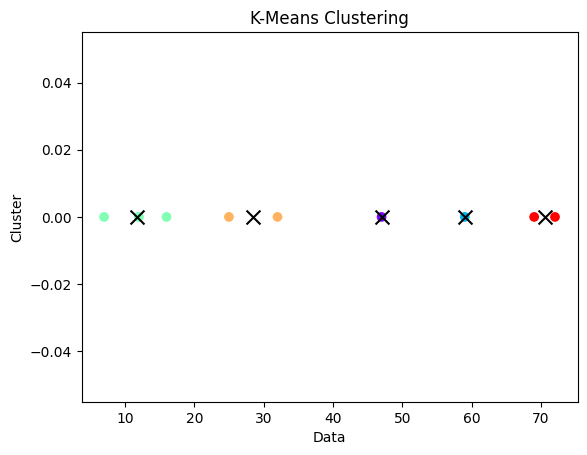

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def decimal_scaling(data):
    max_value = np.max(np.abs(data))
    scaled_data = data / (10 ** (len(str(int(max_value)))) - 1)
    return scaled_data
def z_score_scaling(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    standardized_data = (data - mean) / std_dev
    return standardized_data
def min_max_scaling(data, min_value=0, max_value=1):
    min_data = np.min(data)
    max_data = np.max(data)
    scaled_data = (data - min_data) / (max_data - min_data) * (max_value - min_value) + min_value
    return scaled_data
dataframe = pd.read_csv(r'/content/Flight_delay.csv')
data_array = dataframe.to_numpy()
data = data_array[:10, 28]
scaled_data = decimal_scaling(data)
print("Decimal Scaled:", scaled_data)
standardized_data = z_score_scaling(data)
print("Z-score Scaled:", standardized_data)
scaled_data = min_max_scaling(data)
print("Min-max Scaled:", scaled_data)
K = 5
max_iterations = 100
centroids = data[np.random.choice(range(len(data)), K, replace=False)]
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
for _ in range(max_iterations):
    cluster_assignments = []
    for x in data:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        closest_cluster = np.argmin(distances)
        cluster_assignments.append(closest_cluster)
    new_centroids = []
    for cluster_id in range(K):
        cluster_points = [data[i] for i, cluster in enumerate(cluster_assignments) if cluster == cluster_id]
        if len(cluster_points) == 0:
            new_centroids.append(centroids[cluster_id])
        else:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
    if np.all(np.array(centroids) == np.array(new_centroids)):
        break
    centroids = new_centroids
for i in range(3):
    print("Centroids of Data Points", centroids)
cluster_assignments = np.array(cluster_assignments)
plt.scatter(data, np.zeros_like(data), c=cluster_assignments, cmap='rainbow')
plt.scatter(centroids, np.zeros_like(centroids), c='black', marker='x', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Data')
plt.ylabel('Cluster')
plt.show()